In [1]:
%pip install pycaret
%pip install shap

     |████████████████████████████████| 256kB 4.5MB/s 
     |████████████████████████████████| 1.6MB 9.5MB/s 
     |████████████████████████████████| 6.8MB 37.7MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 266kB 43.7MB/s 
     |████████████████████████████████| 13.9MB 44.5MB/s 
     |████████████████████████████████| 174kB 42.1MB/s 
     |████████████████████████████████| 266kB 45.5MB/s 
     |████████████████████████████████| 66.1MB 55kB/s 
     |████████████████████████████████| 1.8MB 36.0MB/s 
     |████████████████████████████████| 552kB 37.2MB/s 
     |████████████████████████████████| 2.1MB 42.0MB/s 
     |████████████████████████████████| 3.1MB 41.2MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 604kB 40.7MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 153kB 38.4MB/s 
     |████████████████████████████████| 6.0MB 41.7MB/s 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pycaret.classification import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/2.0 Processed Data with Scaled and Log Transformations.csv', index_col='Unnamed: 0')

In [4]:
pd.set_option('display.max_columns',50)
df = df.drop(['first_cont_after','owner_no','ltv_tkt_value','first_order_dt','order_dt','first_cont_dt','tot_contribution_paid_amt','days_to_donation', 'Lifetime Giving'], axis=1)
df.head()

,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,prospect_board,first_cont_order,rolling_tkt_sum,channel_desc_3rd Party,channel_desc_At the Performance,channel_desc_Chat,channel_desc_Default Channel,channel_desc_Email,channel_desc_Fax,channel_desc_Internal Request,channel_desc_Mail,channel_desc_Mobile,channel_desc_Online,channel_desc_Phone,channel_desc_Telefunding,channel_desc_Walk Up,MOS_desc_External,MOS_desc_Internal,MOS_desc_Ticketing,delivery_desc_Digital,delivery_desc_Do Not Print Tickets,delivery_desc_Mail,delivery_desc_Will Call,facility_desc_Academy of Music,facility_desc_Fundraiser,facility_desc_Independence Mall,facility_desc_Other,facility_desc_Perelman,facility_desc_Small venue
0,0.262550,1,5,0,0,0.067821,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
1,0.280947,1,5,0,0,0.162745,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
2,0.170287,1,5,0,0,0.189150,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,0.290096,5,6,0,0,0.093029,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
4,0.110229,2,4,0,0,0.065087,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0


In [ ]:
setup(
    df, 
    target = 'first_cont_order',
    train_size = 0.8,
    fix_imbalance = True,
    create_clusters = True,
    numeric_features = ['geo_area_desc','Prelim Capacity']
)

IntProgress(value=0, description='Processing: ', max=13)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:49:50
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
tot_ticket_paid_amt,Numeric
geo_area_desc,Numeric
Prelim Capacity,Numeric
prospect_board,Categorical
first_cont_order,Label
rolling_tkt_sum,Numeric
channel_desc_3rd Party,Categorical
channel_desc_At the Performance,Categorical
channel_desc_Chat,Categorical
channel_desc_Default Channel,Categorical


In [ ]:
model = compare_models(verbose=True, sort='F1')

In [ ]:
model = tune_model(model)

In [ ]:
predict_model(model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.982,0.8638,0.292,0.4867,0.365,0.3564,0.3684


,owner_no,tot_ticket_paid_amt,geo_area_desc,Prelim Capacity,ltv_tkt_value,rolling_tkt_sum,prospect_board_0,prospect_board_1,channel_desc_3rd Party_0,channel_desc_3rd Party_1,channel_desc_At the Performance_0,channel_desc_At the Performance_1,channel_desc_Chat_0,channel_desc_Chat_1,channel_desc_Default Channel_0,channel_desc_Default Channel_1,channel_desc_Email_0,channel_desc_Email_1,channel_desc_Fax_0,channel_desc_Fax_1,channel_desc_Internal Request_0,channel_desc_Internal Request_1,channel_desc_Mail_0,channel_desc_Mail_1,channel_desc_Mobile_0,channel_desc_Mobile_1,channel_desc_Online_0,channel_desc_Online_1,channel_desc_Phone_0,channel_desc_Phone_1,channel_desc_Telefunding_0,channel_desc_Telefunding_1,channel_desc_Walk Up_0,channel_desc_Walk Up_1,MOS_desc_External_0,MOS_desc_External_1,MOS_desc_Internal_0,MOS_desc_Internal_1,MOS_desc_Ticketing_0,MOS_desc_Ticketing_1,delivery_desc_Digital_0,delivery_desc_Digital_1,delivery_desc_Do Not Print Tickets_0,delivery_desc_Do Not Print Tickets_1,delivery_desc_Mail_0,delivery_desc_Mail_1,delivery_desc_Will Call_0,delivery_desc_Will Call_1,facility_desc_Academy of Music_0,facility_desc_Academy of Music_1,facility_desc_Fundraiser_0,facility_desc_Fundraiser_1,facility_desc_Independence Mall_0,facility_desc_Independence Mall_1,facility_desc_Other_0,facility_desc_Other_1,facility_desc_Perelman_0,facility_desc_Perelman_1,facility_desc_Small venue_0,facility_desc_Small venue_1,data_cluster_0,data_cluster_1,data_cluster_2,data_cluster_3,data_cluster_4,data_cluster_5,data_cluster_6,data_cluster_7,data_cluster_8,data_cluster_9,data_cluster_10,data_cluster_11,data_cluster_12,data_cluster_13,data_cluster_14,data_cluster_15,data_cluster_16,first_cont_order,Label,Score
0,1552978.0,-0.720197,1.0,4.0,0.491819,-0.077225,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0005
1,2343997.0,0.311623,1.0,0.0,0.249276,0.278559,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0773
2,2284022.0,0.030332,1.0,5.0,0.293925,0.256902,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0099
3,2295564.0,0.253383,3.0,4.0,0.295666,0.360911,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0043
4,2398359.0,-0.720197,1.0,0.0,-0.850911,-0.831507,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14070,461414.0,0.451725,1.0,4.0,0.282825,0.477125,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.

In [ ]:
save_model(model, 'PyCaret on Target 1 - CatBoost', verbose=True)

Transformation Pipeline and Model Succesfully Saved


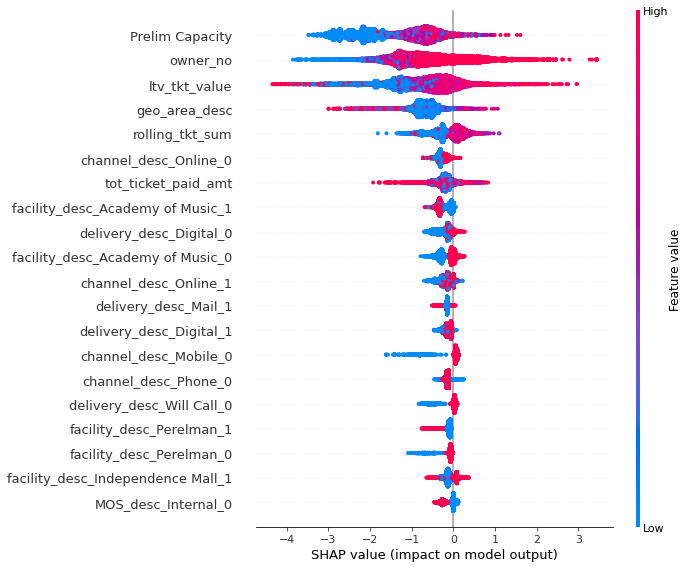

In [ ]:
interpret_model(model, plot = 'summary')

In [ ]:
interpret_model(model, plot = 'reason')